# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Exploratory Data Analysis 

In [ ]:
# Lectura datos, relación variables, mapas de correlación...

In [ ]:
# Utiliza todas las celdas que necesites...

In [3]:
df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [4]:
df.info(9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df['newpaper'] = df['newpaper'].str.replace("s","")
df['newpaper'] = df['newpaper'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


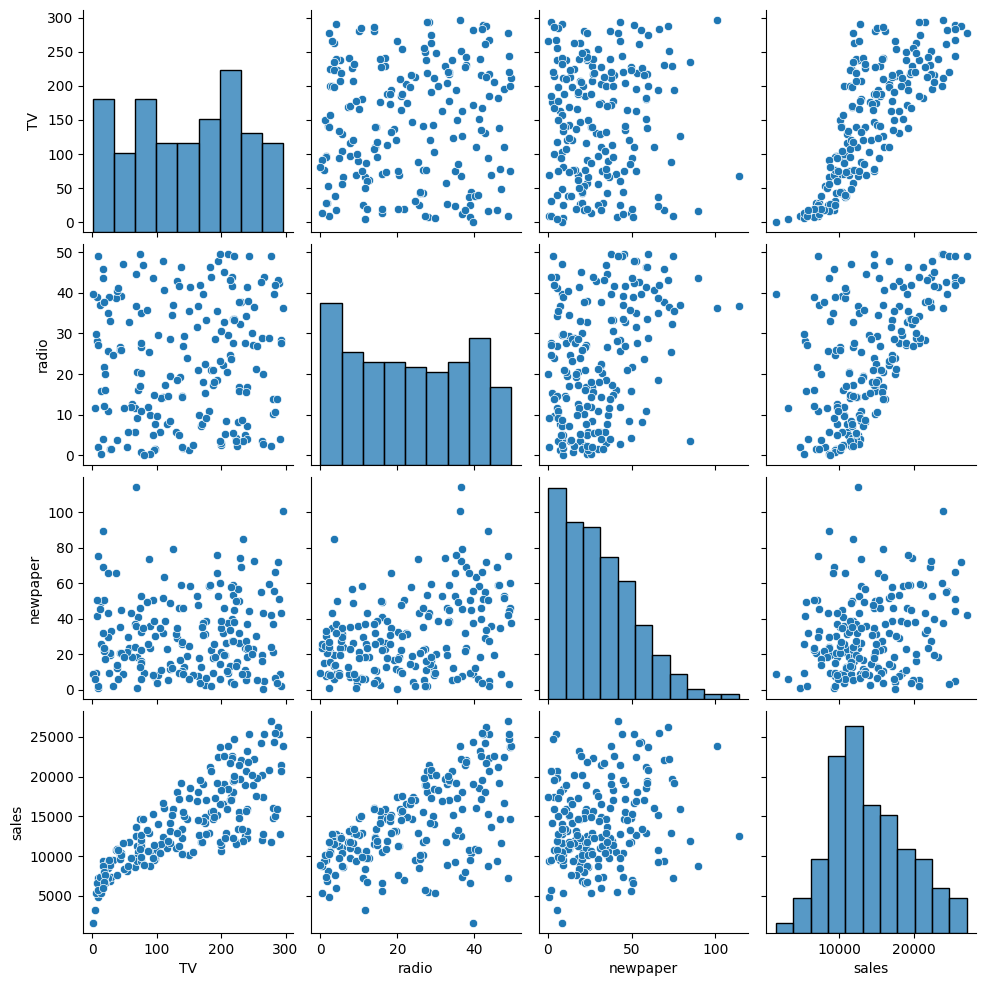

In [8]:
sns.pairplot(df)

<Axes: >

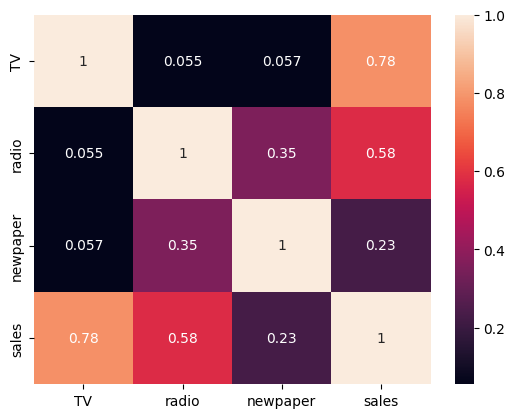

In [9]:
sns.heatmap(df.corr(), annot=True)

## Modelado

In [ ]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [ ]:
# Utiliza todas las celdas que necesites...

In [10]:
X = df.drop(columns=["sales"])
y = df['sales']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [13]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1885.0130310423156
MSE test 6700486.756528875


In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [27]:
pd.DataFrame(X_train_scal, columns=df.columns[:-1]).describe()

,TV,radio,newpaper
count,160.000000,160.000000,160.000000
mean,0.482473,0.443940,0.261675
std,0.279289,0.293714,0.189504
min,0.000000,0.000000,0.000000
25%,0.243414,0.182556,0.109499
50%,0.472118,0.414807,0.226473
75%,0.717414,0.697769,0.380387
max,1.000000,1.000000,1.000000


In [28]:
pd.DataFrame(X_test_scal, columns=df.columns[:-1]).describe()

,TV,radio,newpaper
count,40.000000,40.000000,40.000000
mean,0.515241,0.553245,0.283729
std,0.348300,0.318207,0.201001
min,-0.011632,-0.006085,0.045734
25%,0.124615,0.323022,0.104661
50%,0.648478,0.597363,0.216359
75%,0.780021,0.836714,0.442392
max,0.980499,0.995943,0.783641


In [29]:
lr = LinearRegression()

lr.fit(X_train_scal, y_train)

y_pred = lr.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1885.0130310423149
MSE test 6700486.756528879


In [31]:
ridge = Ridge(alpha=0.001)

ridge.fit(X_train_scal, y_train)

y_pred = ridge.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1885.1599598542748
MSE test 6700838.254726981


In [35]:
baseline_error = 6700486

In [43]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scal)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

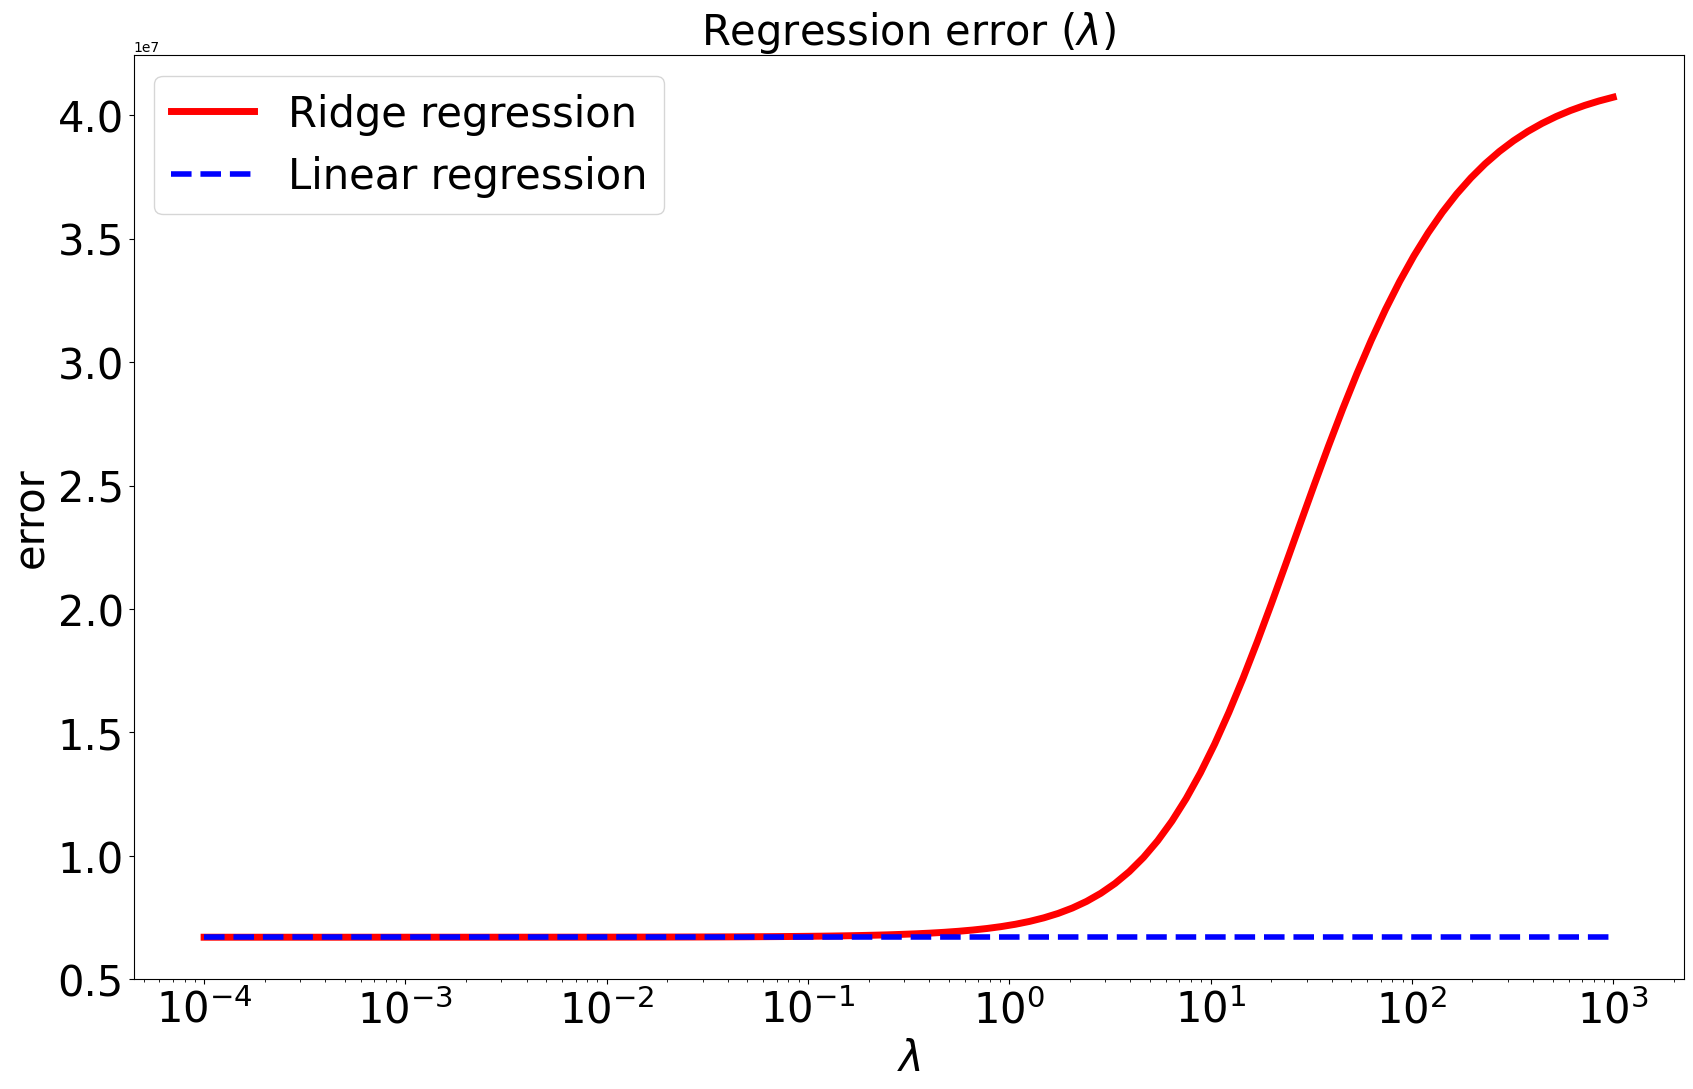

In [44]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [45]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [46]:
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly_train, y_train)

y_pred = pol_reg2.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 508.768730959485
MSE test 937286.0482638465


In [47]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [48]:
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly_train, y_train)

y_pred = pol_reg3.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 450.3377198433839
MSE test 674482.3418615028


In [49]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [50]:
pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly_train, y_train)

y_pred = pol_reg4.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 413.2
MSE test 596925.95


In [51]:
poly = PolynomialFeatures(degree=5)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [52]:
pol_reg5 = LinearRegression()
pol_reg5.fit(X_poly_train, y_train)

y_pred = pol_reg5.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 599.6
MSE test 1236330.4


Vemos que puede ser interesante por la curva bias vs variance, el regularizar los podelos P4 P5, en mayor o menor medida, para reducir la complejidad y conseguir el mínimo error en test, es decir, un modelo que generalice mejor ante nuevos datos.

In [71]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

pol_reg4_reg = Ridge(alpha=0.000001)
pol_reg4_reg.fit(X_poly_train, y_train)

y_pred = pol_reg4_reg.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 418.9545342565493
MSE test 611359.1265021941


In [65]:
poly = PolynomialFeatures(degree=5)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

pol_reg4_reg = Ridge(alpha=0.00001)
pol_reg4_reg.fit(X_poly_train, y_train)

y_pred = pol_reg4_reg.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 496.76444119495716
MSE test 802279.999468256


In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
np.logspace(-5, 1, n_alphas)

array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87381742e-04, 2.15443469e-04, 2.47707636e-04,
       2.84803587e-04, 3.27454916e-04, 3.76493581e-04, 4.32876128e-04,
       4.97702356e-04, 5.72236766e-04, 6.57933225e-04, 7.56463328e-04,
       8.69749003e-04, 1.00000000e-03, 1.14975700e-03, 1.32194115e-03,
       1.51991108e-03, 1.74752840e-03, 2.00923300e-03, 2.31012970e-03,
       2.65608778e-03, 3.05385551e-03, 3.51119173e-03, 4.03701726e-03,
       4.64158883e-03, 5.33669923e-03, 6.13590727e-03, 7.05480231e-03,
       8.11130831e-03, 9.32603347e-03, 1.07226722e-02, 1.23284674e-02,
       1.41747416e-02, 1.62975083e-02, 1.87381742e-02, 2.15443469e-02,
      

In [94]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

pol_reg4_reg = Ridge()

parameters = {'alpha':np.logspace(-5, 1, n_alphas)}

gs = GridSearchCV(pol_reg4_reg, parameters, scoring="neg_mean_absolute_error", cv=5)

gs.fit(X_poly_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1....
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])},
             scoring='neg_mean_absolute_error')

In [95]:
gs.best_estimator_

Ridge(alpha=3.511191734215127e-05)

In [89]:
gs.best_score_

-329.26000251664794

In [90]:
gs.best_params_

{'alpha': 3.511191734215127e-05}

In [91]:
poly = PolynomialFeatures(degree=5)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

pol_reg5_reg = Ridge()

parameters = {'alpha':np.logspace(-5, 1, n_alphas)}

gs = GridSearchCV(pol_reg5_reg, parameters, scoring="neg_mean_absolute_error", cv=5)

gs.fit(X_poly_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1....
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])},
             scoring='neg_mean_absolute_error')

In [92]:
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Ridge(alpha=0.00021544346900318845)
-336.86630136424463
{'alpha': 0.00021544346900318845}


Modelo final, será el modelo con menor error en test, es decir, el que mejor generalice, a partir de los valores de los parámetros que haya encontrado en el gridsearch.

In [97]:
gs.best_params_

{'alpha': 3.511191734215127e-05}

In [98]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

pol_reg4_reg = Ridge(alpha=gs.best_params_['alpha'])
pol_reg4_reg.fit(X_poly_train, y_train)

y_pred = pol_reg4_reg.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 417.0003587755653
MSE test 604178.425565022


In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
from sklearn.model_selection import cross_val_score

poly.fit(X)
X_poly = poly.transform(X)


results = cross_val_score(pol_reg4_reg,X_poly,y,scoring="neg_mean_absolute_error", cv=5)
print(results)
print(results.mean())
print(results.std())

[-365.86315344 -342.62021501 -336.82170366 -398.05466183 -305.39755505]
-349.7514577974164
30.913065557447755


In [136]:
poly = PolynomialFeatures(degree=4)
poly.fit(X)
X_poly= poly.transform(X)

pol_reg4 = LinearRegression()

results = cross_val_score(pol_reg4,X_poly,y,scoring="neg_mean_absolute_error", cv=5)
print(results)
print(results.mean())
print(results.std())

[ -768.7895844   -342.62022012  -336.82170717  -398.05466419
 -3490.80030348]
-1067.4172958735635
1222.2201732559793


## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...

In [106]:
pol_reg4_reg.coef_

array([ 0.00000000e+00,  3.57952580e+04, -5.48643904e+02,  2.94984342e+03,
       -8.12954260e+04,  1.66155398e+04, -7.28786254e+03,  1.07996059e+04,
        8.12097506e+02, -6.85113100e+03,  8.87790461e+04,  9.31790087e+03,
       -5.54252834e+03, -2.02938806e+04,  1.97345111e+04,  4.17504079e+03,
       -7.67374765e+03, -9.88165339e+03, -1.32464078e+04,  2.21469140e+04,
       -3.60151977e+04, -5.74392448e+03,  8.91428720e+03,  1.33839203e+03,
       -1.26167931e+04,  7.69437563e+03,  1.43836445e+04, -1.05698995e+04,
        6.48911130e+03, -1.42670333e+04, -5.06610811e+01,  6.34916707e+03,
        1.34497098e+04,  4.76798687e+02, -1.31071611e+04])

In [107]:
pol_reg4_reg.intercept_

3794.1767289710842

Después de haber entreenado varios modelos, teniendo en cuenta el overfitting(reduciendo complejidad añadiendo una regularización de Ridge) y underfitting (añadiendo complejidad con regresiones polinómicas de mayor grado), hemos obtenido una regresión polinómica de grado 4 junto con una regularización de Ridge con un parámetro de alpha, obtenido de un ejercicio de hiperparametrización realizado con un gridsearch combinado con un CV, que nos ha dado el modelo que menor error obtenemos en test, es decir, el modelo que mejor generaliza ante neuvos datos.

In [124]:
tv = 130
radio = 50
newspaper = 10

In [125]:
nueva_campaña = [[tv, radio, newspaper]]
nueva_campaña

[[130, 50, 10]]

In [126]:
nueva_campaña_scal = scaler.transform(nueva_campaña)
nueva_campaña_scal

array([[0.43072186, 1.00811359, 0.08531223]])

In [127]:
nueva_campaña_pol = poly.transform(nueva_campaña_scal)
nueva_campaña_pol

array([[1.00000000e+00, 4.30721861e-01, 1.00811359e+00, 8.53122252e-02,
        1.85521322e-01, 4.34216562e-01, 3.67458404e-02, 1.01629301e+00,
        8.60044136e-02, 7.27817576e-03, 7.99080889e-02, 1.87026566e-01,
        1.58272368e-02, 4.37739617e-01, 3.70439811e-02, 3.13486941e-03,
        1.02453880e+00, 8.67022182e-02, 7.33722790e-03, 6.20917369e-04,
        3.44181608e-02, 8.05564304e-02, 6.81713687e-03, 1.88544023e-01,
        1.59556525e-02, 1.35025679e-03, 4.41291257e-01, 3.73445408e-02,
        3.16030445e-03, 2.67442685e-04, 1.03285148e+00, 8.74056844e-02,
        7.39675916e-03, 6.25955238e-04, 5.29718424e-05]])

In [128]:
pol_reg4_reg.predict(nueva_campaña_pol)

array([18569.53788921])